In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ballmdr', api_key='oSgf6vHed7evuaiXDdBb')

import fxcmpy
con = fxcmpy.fxcmpy(config_file = '/Users/ballmdr/blockchain-python/FXCM/fxcm.cfg')

In [2]:
def z(df):
    return (df - df.mean()) / df.std()

symbols = ['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CAD', 'USD/CHF', 'AUD/USD', 'NZD/USD',
            'EUR/AUD', 'EUR/CAD', 'EUR/CHF', 'EUR/GBP', 'EUR/JPY', 'EUR/NZD',
            'GBP/AUD', 'GBP/CAD', 'GBP/CHF', 'GBP/JPY', 'GBP/NZD',
            'AUD/CAD', 'AUD/CHF', 'AUD/JPY', 'AUD/NZD',
            'NZD/CAD', 'NZD/CHF', 'NZD/JPY',
            'CAD/CHF', 'CAD/JPY',
            'CHF/JPY']
#symbols = con.get_instruments()


In [3]:
symbols = ['EUR/USD', 'USD/CHF', 'USD/JPY', 'EUR/NZD']

In [7]:
df = dict()
for symbol in symbols:
    df[symbol] = con.get_candles(symbol, period='D1', number=175) #20 Days
    df[symbol]['Close'] = (df[symbol]['bidclose'] + df[symbol]['askclose'])/2

In [8]:
newdf = df
for symbol in symbols:
    newdf[symbol]['Close_z'] = z(df[symbol]['Close'])

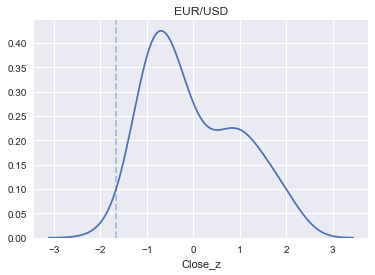

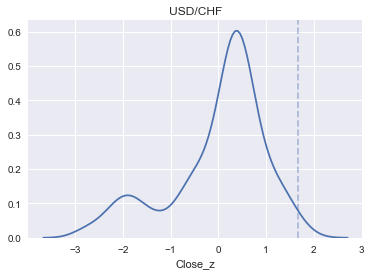

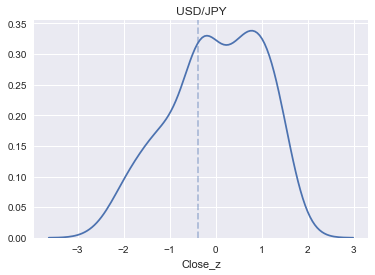

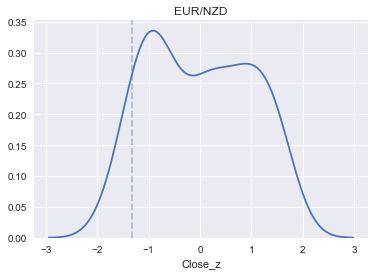

In [9]:
for symbol in symbols:
    plt.title(symbol)
    plt.axvline(x=newdf[symbol].iloc[-1]['Close_z'], linestyle='--', alpha=0.4)
    sns.distplot(newdf[symbol]['Close_z'], hist=False)
    plt.show()

In [18]:
def getFig(symbol_focus):
    mean = np.mean(newdf[symbol_focus]['Close_z'])
    sd = np.std(newdf[symbol_focus]['Close_z']) * 3
    tripplesd = sd + mean
    tripplesd2 = mean - sd
    fig = {
        'data': [{
            'type': 'box',
            'y': newdf[symbol_focus]['Close_z'],
            'box': { 'visible': True },
            'line': { 'color': 'black' },
            'meanline': { 'visible': True },
            'fillcolor': '#8dd3c7',
            'opacity': 0.6,
            'x0': symbol_focus
        }],
        'layout': {
            'title': symbol_focus,
            'yaxis': { 'zeroline': False },
            'shapes': [
                # Line Horizontal
                {
                    'type': 'line',
                    'opacity': 0.7,
                    'x0': 0.5,
                    'y0': newdf[symbol_focus].iloc[-1]['Close_z'],
                    'x1': 1,
                    'y1': newdf[symbol_focus].iloc[-1]['Close_z'],
                    'line': {
                        'color': 'rgb(50, 171, 96)',
                        'width': 4,
                        'dash': 'dashdot',
                    },
                },
                {
                    'type': 'line',
                    'opacity': 0.7,
                    'x0': 0.5,
                    'y0': tripplesd,
                    'x1': 1,
                    'y1': tripplesd,
                    'line': {
                        'color': 'red',
                        'width': 4,
                        'dash': 'dashdot',
                    },
                },
                {
                    'type': 'line',
                    'opacity': 0.7,
                    'x0': 0.5,
                    'y0': tripplesd2,
                    'x1': 1,
                    'y1': tripplesd2,
                    'line': {
                        'color': 'red',
                        'width': 4,
                        'dash': 'dashdot',
                    },
                }
            ]
        }
    }
    return fig

In [19]:
symbol_focus = 'EUR/USD'
fig = getFig(symbol_focus)
py.iplot(fig, filename = 'box', validate = False)

C:\Users\ballmdr\Anaconda3\envs\quant\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [20]:
symbol_focus = 'USD/CHF'
fig = getFig(symbol_focus)
py.iplot(fig, filename = 'box', validate = False)

C:\Users\ballmdr\Anaconda3\envs\quant\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [21]:
symbol_focus = 'USD/JPY'
fig = getFig(symbol_focus)
py.iplot(fig, filename = 'box', validate = False)

C:\Users\ballmdr\Anaconda3\envs\quant\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

